## Trabalho - Data Science using Python - MBA DSA_29

### Projeto 02
### Professora: Carolina Zambelli Kamada

Alunos:

1. Lenon Alcântara Machado - RA: 2400348
2. Giovanna Ferrero - RA: 2400807

Dicionário do dataset utilizado para este trabalho:

dep_time: datetime_partida
arr_time: datetime_chegada
carrier: carrier
flight: id_voo
tailnum: id_aeronave
air_time: tempo_voo
distance: distancia
origin: origem
dest: destino

## Tratamento dos dados

In [1]:
# Importação das libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Configuração de estilo
sns.set(style="whitegrid")

In [3]:
# Carregando o dataset
file_path = './nycflights.csv'
data = pd.read_csv(file_path)

In [4]:
# Exibindo as primeiras linhas do dataset
data.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [5]:
# Exibindo informações gerais do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  336776 non-null  int64  
 1   year        336776 non-null  int64  
 2   month       336776 non-null  int64  
 3   day         336776 non-null  int64  
 4   dep_time    328521 non-null  float64
 5   dep_delay   328521 non-null  float64
 6   arr_time    328063 non-null  float64
 7   arr_delay   327346 non-null  float64
 8   carrier     336776 non-null  object 
 9   tailnum     334264 non-null  object 
 10  flight      336776 non-null  int64  
 11  origin      336776 non-null  object 
 12  dest        336776 non-null  object 
 13  air_time    327346 non-null  float64
 14  distance    336776 non-null  int64  
 15  hour        328521 non-null  float64
 16  minute      328521 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 43.7+ MB


In [6]:
# Verificando se há valores nulos no dataset
missing_values = data.isnull().sum()

In [7]:
print(missing_values)

Unnamed: 0       0
year             0
month            0
day              0
dep_time      8255
dep_delay     8255
arr_time      8713
arr_delay     9430
carrier          0
tailnum       2512
flight           0
origin           0
dest             0
air_time      9430
distance         0
hour          8255
minute        8255
dtype: int64


In [9]:
# Removendo as linhas com valores nulos das colunas essenciais para a análise
data_cleaned = data.dropna(subset=['dep_delay', 'arr_delay'])

In [10]:
# Verificando o dataset após a remoção das linhas com valores nulos
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  327346 non-null  int64  
 1   year        327346 non-null  int64  
 2   month       327346 non-null  int64  
 3   day         327346 non-null  int64  
 4   dep_time    327346 non-null  float64
 5   dep_delay   327346 non-null  float64
 6   arr_time    327346 non-null  float64
 7   arr_delay   327346 non-null  float64
 8   carrier     327346 non-null  object 
 9   tailnum     327346 non-null  object 
 10  flight      327346 non-null  int64  
 11  origin      327346 non-null  object 
 12  dest        327346 non-null  object 
 13  air_time    327346 non-null  float64
 14  distance    327346 non-null  int64  
 15  hour        327346 non-null  float64
 16  minute      327346 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 45.0+ MB


## Análise Exploratória

In [11]:
# Analisando o número de registros por companhia aérea e seus atrasos médios
carrier_delay = data_cleaned.groupby('carrier').agg(
    avg_dep_delay=('dep_delay', 'mean'),
    avg_arr_delay=('arr_delay', 'mean'),
    count=('carrier', 'size')
).reset_index()

In [12]:
# Ordenando as companhias com base no atraso médio na chegada
carrier_delay_sorted = carrier_delay.sort_values(by='avg_arr_delay', ascending=False)

#### Heatmap das rotas com maiores atrasos

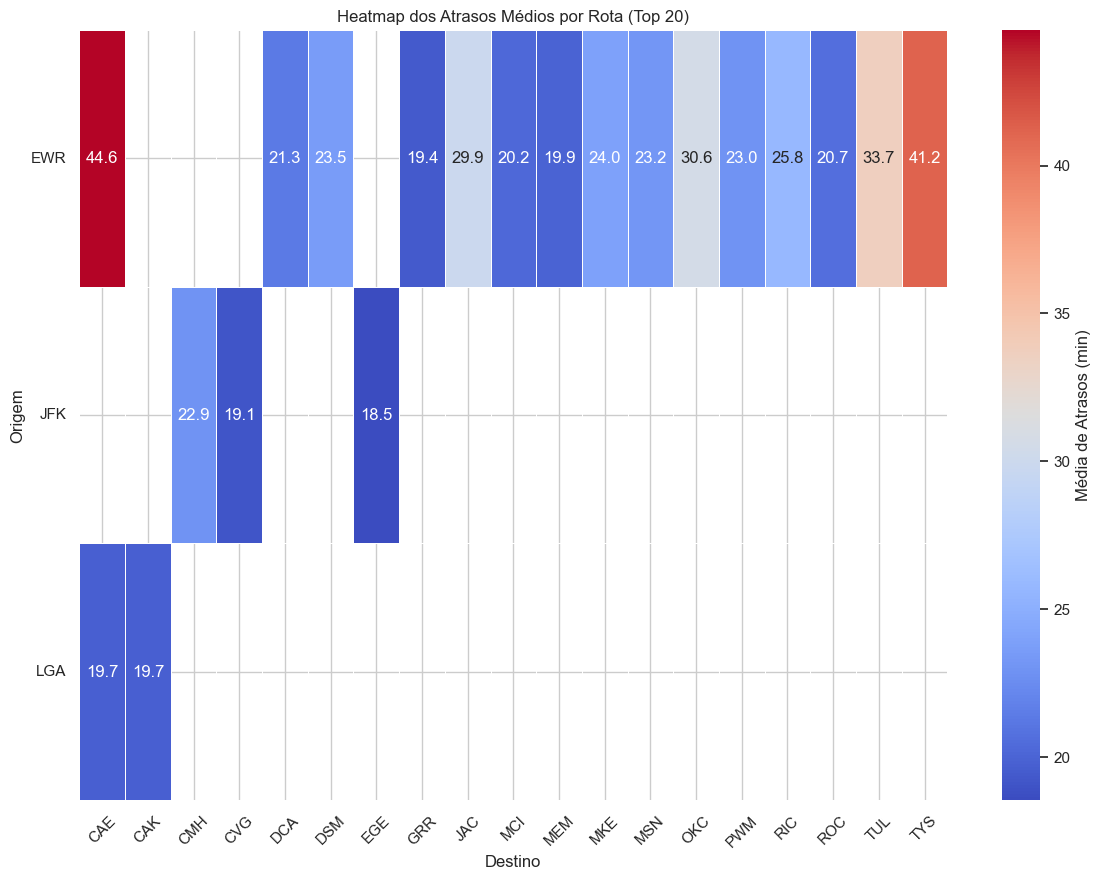

In [32]:
# Mostrando as 20 rotas com os maiores atrasos
top_routes = route_delay_sorted.head(20)

plt.figure(figsize=(14, 10))
pivot_route_delay = top_routes.pivot(index="origin", columns="dest", values="avg_arr_delay")
sns.heatmap(pivot_route_delay, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5, cbar_kws={'label': 'Média de Atrasos (min)'})
plt.title('Heatmap dos Atrasos Médios por Rota (Top 20)')
plt.xlabel('Destino')
plt.ylabel('Origem')
plt.xticks(rotation=45)  
plt.yticks(rotation=0) 
plt.show()

#### Análise das companhias aéreas com maior atraso:

1. Qual(s) a(s) companhia(s) que mais registram atrasos? Analise qualitativamente e quantitativamente.

#### Boxplot com as companhias aéreas com os maiores atrasos na chegada

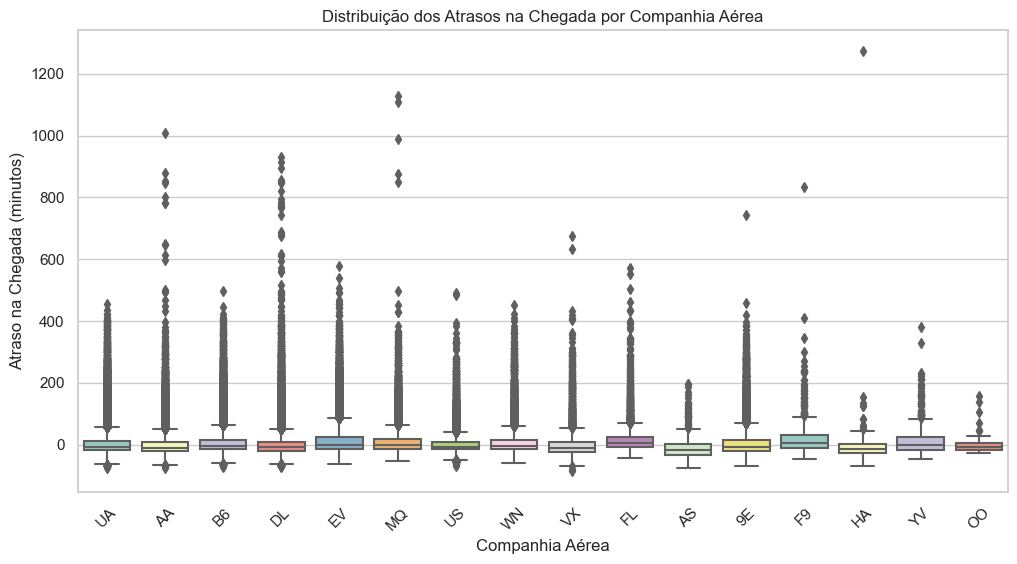

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='carrier', y='arr_delay', data=data_cleaned, palette="Set3")
plt.title('Distribuição dos Atrasos na Chegada por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso na Chegada (minutos)')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Exibindo as companhias aéreas com os maiores atrasos
print(carrier_delay_sorted.head())

   carrier  avg_dep_delay  avg_arr_delay  count
6       F9      20.201175      21.920705    681
7       FL      18.605984      20.115906   3175
5       EV      19.838929      15.796431  51108
15      YV      18.898897      15.556985    544
10      OO      12.586207      11.931034     29


Companhias como F9 e FL apresentam os maiores atrasos médios. Estes atrasos podem ser causados por diversos fatores, incluindo gerenciamento operacional, manutenção de aeronaves e fatores externos como tráfego aéreo ou condições meteorológicas.

Uma sugestão seria melhorar a eficiência operacional dessas companhias, como otimização de rotas, melhorias na manutenção preventiva e reforço na comunicação com os passageiros durante os períodos de maior atraso.

Podemos notar também que, apesar da companhia aerea F9 ter a maior média de atrasos, a empresa EV é campeã no número de ocorrências de atrasos em relação as suas concorrentes.

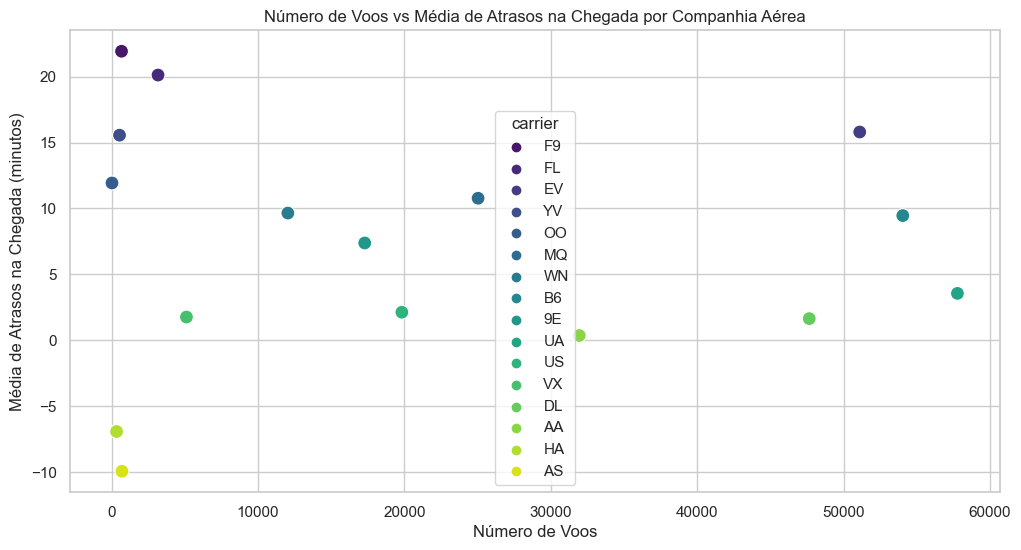

In [14]:
# Gráfico executivo: Número de voos por companhia aérea e seus atrasos médios
plt.figure(figsize=(12, 6))
sns.scatterplot(x='count', y='avg_arr_delay', data=carrier_delay_sorted, hue='carrier', palette='viridis', s=100)
plt.title('Número de Voos vs Média de Atrasos na Chegada por Companhia Aérea')
plt.xlabel('Número de Voos')
plt.ylabel('Média de Atrasos na Chegada (minutos)')
plt.show()

#### Tendências de atrasos ao longo do mês

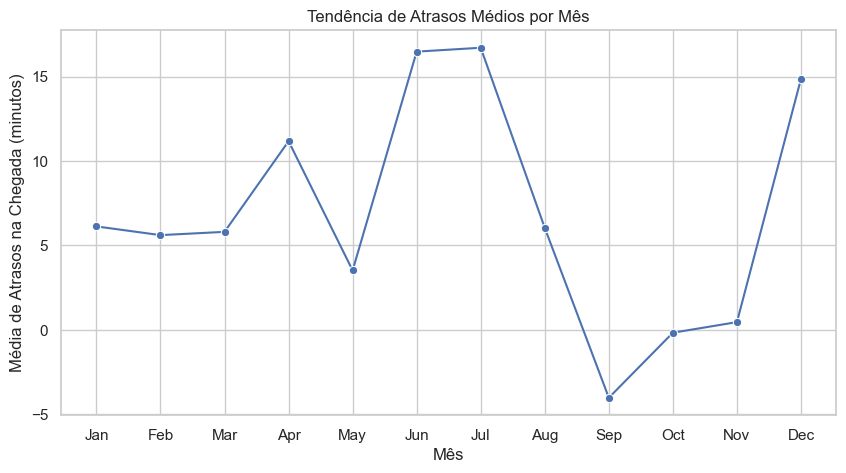

In [34]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='month', y='avg_arr_delay', data=monthly_delay, marker='o')
plt.title('Tendência de Atrasos Médios por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Atrasos na Chegada (minutos)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Analisando a influência da rota ou da aeronave nos atrasos

2. A rota ou aeronave podem influenciar nos atrasos?

#### Verificando a influência das rotas nos atrasos

In [15]:
# Agrupando por rota (origem e destino) e calculando o atraso médio na chegada
route_delay = data_cleaned.groupby(['origin', 'dest']).agg(
    avg_arr_delay=('arr_delay', 'mean'),
    count=('arr_delay', 'size')
).reset_index()

In [16]:
# Ordenando as rotas com base no atraso médio na chegada
route_delay_sorted = route_delay.sort_values(by='avg_arr_delay', ascending=False)

In [17]:
# Exibindo as rotas com os maiores atrasos médios
print(route_delay_sorted.head())

   origin dest  avg_arr_delay  count
13    EWR  CAE      44.585106     94
83    EWR  TYS      41.150160    313
81    EWR  TUL      33.659864    294
52    EWR  OKC      30.619048    315
36    EWR  JAC      29.894737     19


As rotas partindo do aeroporto de Newark (EWR) se destacam com os maiores atrasos. Isso pode ser devido a congestionamentos frequentes neste aeroporto ou problemas específicos com a logística desse aeroporto em relação a essas rotas.

#### Verificando a influência da aeronave nos atrasos

In [22]:
# Agrupando por aeronave (tailnum) e calculando o atraso médio na chegada
aircraft_delay = data_cleaned.groupby('tailnum').agg(
    avg_arr_delay=('arr_delay', 'mean'),
    count=('arr_delay', 'size')
).reset_index()

In [23]:
# Ordenando as aeronaves com base no atraso médio na chegada
aircraft_delay_sorted = aircraft_delay.sort_values(by='avg_arr_delay', ascending=False)

In [24]:
# Exibindo as aeronaves com os maiores atrasos médios
print(aircraft_delay_sorted.head())

     tailnum  avg_arr_delay  count
3406  N844MH          320.0      1
3670  N911DA          294.0      1
3742  N922EV          276.0      1
2183  N587NW          264.0      1
3442  N851NW          219.0      1


#### Verificando os padrões de atrasos ao longo do tempo (por mês e dia da semana)

3. Existe algum padrão ou tendência nos atrasos ? Se sim, o que pode ser feito para reduzi-los?

In [25]:
# Agrupando por mês para analisar os atrasos médios
monthly_delay = data_cleaned.groupby('month').agg(
    avg_arr_delay=('arr_delay', 'mean')
).reset_index()

In [27]:
# Criando uma nova coluna 'day_of_week' usando o método .loc[]
data_cleaned.loc[:, 'day_of_week'] = pd.to_datetime(data_cleaned[['year', 'month', 'day']]).dt.dayofweek

# Agora, você pode agrupar por dia da semana e calcular os atrasos médios sem problemas
weekly_delay = data_cleaned.groupby('day_of_week').agg(
    avg_arr_delay=('arr_delay', 'mean')
).reset_index()

In [28]:
# Exibindo os padrões de atrasos por mês e dia da semana
print(monthly_delay)
print(weekly_delay)

    month  avg_arr_delay
0       1       6.129972
1       2       5.613019
2       3       5.807577
3       4      11.176063
4       5       3.521509
5       6      16.481330
6       7      16.711307
7       8       6.040652
8       9      -4.018364
9      10      -0.167063
10     11       0.461347
11     12      14.870355
   day_of_week  avg_arr_delay
0            0       9.653739
1            1       5.388526
2            2       7.051119
3            3      11.740819
4            4       9.070120
5            5      -1.448828
6            6       4.820024


Os meses de verão (junho e julho) e dezembro mostram os maiores atrasos, provavelmente devido ao aumento do tráfego aéreo e fatores sazonais, como condições climáticas desfavoráveis.

Uma possível alternativa seria aumentar a capacidade de resposta operacional durante os meses de verão e o período de fim de ano, como incluir alocação de recursos adicionais e planejamento de contingências pra esses períodos de sobrecarga, por exemplo.

#### Atrasos distribuídos ao longo dos dias da semana por cada companhia aérea

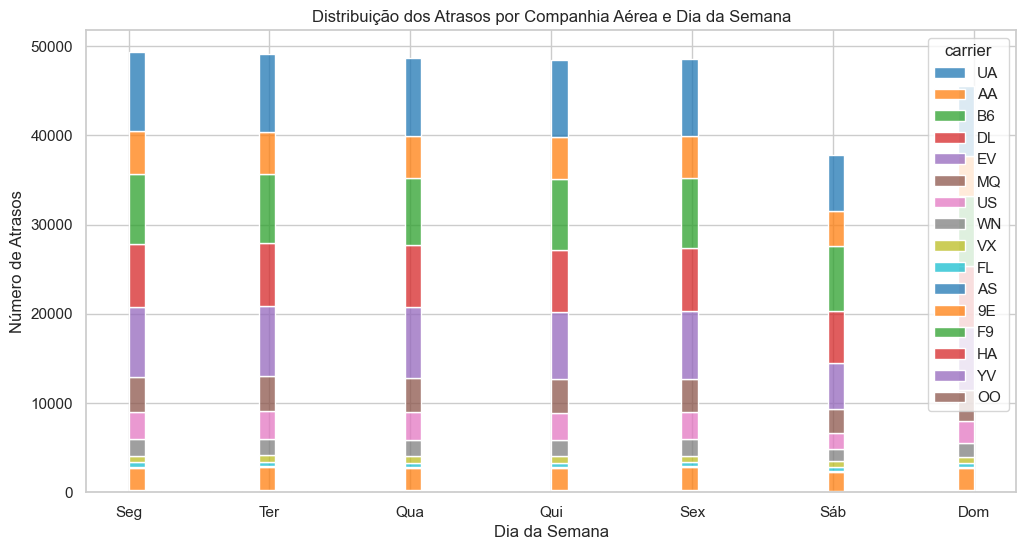

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_cleaned, x='day_of_week', hue='carrier', multiple='stack', palette="tab10")
plt.title('Distribuição dos Atrasos por Companhia Aérea e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Atrasos')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.show()

Quinta-feira foi identificada como o dia com os maiores atrasos médios, possivelmente devido a um pico no volume de voos, especialmente voos de negócios.